# SHAP - #3

SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions (see papers for details and citations).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/My\ Drive/DL/

/content/drive/My Drive/DL


#### Clone SHAP Repo

In [ ]:
!git clone https://github.com/slundberg/shap.git

Cloning into 'shap'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 8075 (delta 1), reused 5 (delta 1), pack-reused 8067
Receiving objects: 100% (8075/8075), 176.50 MiB | 13.43 MiB/s, done.
Resolving deltas: 100% (5357/5357), done.
Checking out files: 100% (393/393), done.


In [ ]:
cd shap

/content/drive/My Drive/DL/shap


### Install shap

In [ ]:
!pip install shap

     |████████████████████████████████| 327kB 7.9MB/s 
  Created wheel for shap: filename=shap-0.37.0-cp36-cp36m-linux_x86_64.whl size=463926 sha256=62c351696a9b032802a95843f904d5d924d06ba6fc6ef1f2821c6a019a9c62ef
  Stored in directory: /root/.cache/pip/wheels/df/ad/b0/aa7815ec68850d66551ef618095eccb962c8f6022f1d3dd989
Successfully built shap


## SHAP with VGG16 : IMAGE NET 
### (Understanding / Practice)

index_names:############### [['dowitcher' 'red-backed_sandpiper']
 ['meerkat' 'mongoose']]


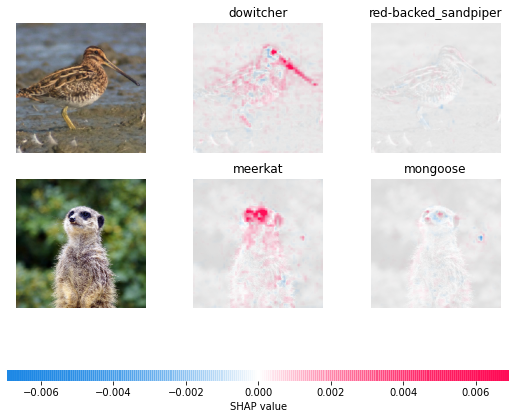

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
import shap
# import keras.backend as K
import tensorflow.compat.v1.keras.backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
import json

# load pre-trained model and choose two images to explain
model = VGG16(weights='imagenet', include_top=True)
X,y = shap.datasets.imagenet50()
# print(X)
to_explain = X[[39,41]]
# print("to_explain:",to_explain)

# load the ImageNet class names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
fname = shap.datasets.cache(url)
with open(fname) as f:
    class_names = json.load(f)
# print(class_names)

# explain how the input to the 7th layer of the model explains the top two classes
def map2layer(x, layer):
    feed_dict = dict(zip([model.layers[0].input], [preprocess_input(x.copy())]))
    return K.get_session().run(model.layers[layer].input, feed_dict)

e = shap.GradientExplainer((model.layers[7].input, model.layers[-1].output), map2layer(preprocess_input(X.copy()), 7))
shap_values,indexes = e.shap_values(map2layer(to_explain, 7), ranked_outputs=2)

# get the names for the classes
index_names = np.vectorize(lambda x: class_names[str(x)][1])(indexes)
print("index_names:###############",index_names)

# plot the explanations
shap.image_plot(shap_values, to_explain, index_names)

# SHAP for COVID - PNEUMONIA Model

*   Load the Pre-trained Model
*   Get the image to Explain
* Plugin the pre-trained model in to SHAP for explanation
* Use Gradient Explainer for interpretation of last but layer in RNN


In [ ]:
pip install Pillow

In [ ]:
import tensorflow.compat.v1.keras.backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

In [ ]:
# load and show an image with Pillow
from PIL import Image
import numpy
# Open the image form working directory

X = pd.read_csv("/content/drive/My Drive/DL/covid-cxr-master/data/processed/train_set.csv")
image = Image.open("/content/drive/My Drive/DL/covid-cxr-master/data/"+X.iloc[0][1]).convert("RGB");
#image.show()
image.size
arr = numpy.array(image)
print(type(arr))
print(arr.shape)
print(arr)
image.show()

# from PIL import Image
# import numpy as np

# PIL_image = Image.fromarray(np.uint8(numpy_image)).convert('RGB')

# PIL_image = Image.fromarray(numpy_image.astype('uint8'), 'RGB')
#/content/drive/MyDrive/DL/covid-cxr-master/data/rsna/0004cfab-14fd-4e49-80ba-63a80b6bddd6.jpg

<class 'numpy.ndarray'>
(1024, 1024, 3)
[[[ 1  1  1]
  [ 2  2  2]
  [ 3  3  3]
  ...
  [ 3  3  3]
  [ 2  2  2]
  [ 1  1  1]]

 [[ 2  2  2]
  [ 3  3  3]
  [ 4  4  4]
  ...
  [ 4  4  4]
  [ 3  3  3]
  [ 2  2  2]]

 [[ 3  3  3]
  [ 4  4  4]
  [ 5  5  5]
  ...
  [ 5  5  5]
  [ 4  4  4]
  [ 3  3  3]]

 ...

 [[17 17 17]
  [31 31 31]
  [33 33 33]
  ...
  [10 10 10]
  [10 10 10]
  [ 6  6  6]]

 [[18 18 18]
  [32 32 32]
  [32 32 32]
  ...
  [ 9  9  9]
  [10 10 10]
  [ 5  5  5]]

 [[ 5  5  5]
  [18 18 18]
  [16 16 16]
  ...
  [ 6  6  6]
  [ 7  7  7]
  [ 2  2  2]]]


### Get Image to Explain

In [ ]:
import pandas as pd
import numpy as np
import sklearn.datasets
import os

X = pd.read_csv("/content/drive/My Drive/DL/covid-cxr-master/data/processed/train_set.csv")


In [ ]:
X.head

<bound method NDFrame.head of       Unnamed: 0  ...     label_str
0            409  ...  non-COVID-19
1            150  ...  non-COVID-19
2            199  ...  non-COVID-19
3            349  ...  non-COVID-19
4             13  ...  non-COVID-19
...          ...  ...           ...
1484         334  ...  non-COVID-19
1485         149  ...  non-COVID-19
1486         421  ...  non-COVID-19
1487         311  ...  non-COVID-19
1488         672  ...  non-COVID-19

[1489 rows x 4 columns]>

In [ ]:
X.iloc[0][1] ## Get Image to Explain

'rsna/0759abcb-6e42-4837-956f-d4e8a4cd3537.jpg'

### Get Pre-trained Model to plugin to SHAP

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("/content/drive/My Drive/DL/covid-cxr-master/results/models/model20201121-152553.h5", compile=False)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv0_0 (Conv2D)                (None, 224, 224, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 224, 224, 16) 64          conv0_0[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 224, 224, 16) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
import shap
# import keras.backend as K
import tensorflow.compat.v1.keras.backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
import json

# load pre-trained model and choose two images to explain
# model = VGG16(weights='imagenet', include_top=True)
model = model # Load pre-trained Model
# X,y = shap.datasets.imagenet50() ## TODO. : THROWS Error Coz image Data set needs to be of Dimension 224* 224
# to_explain = X[[39,41]]
to_explain  = X

# load the ImageNet class names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
fname = shap.datasets.cache(url)
with open(fname) as f:
    class_names = json.load(f)

# explain how the input to the 7th layer of the model explains the top two classes
def map2layer(x, layer):
    feed_dict = dict(zip([model.layers[0].input], [preprocess_input(x.copy())]))
    return K.get_session().run(model.layers[layer].input, feed_dict)



e = shap.GradientExplainer((model.layers[7].input, model.layers[-1].output), map2layer(preprocess_input(X.copy()), 7))


shap_values,indexes = e.shap_values(map2layer(to_explain, 7), ranked_outputs=2)

# get the names for the classes
index_names = np.vectorize(lambda x: class_names[str(x)][1])(indexes)

# plot the explanations
shap.image_plot(shap_values, to_explain, index_names)

AttributeError: ignored

In [ ]:
from tensorflow.keras.models import load_model
def F1Score():
  return
custom_objects={'F1Score':F1Score()}
model_temp = load_model('/content/drive/My Drive/DL/covid-cxr-master/results/models/model20201121-152553.h5', custom_objects=custom_objects, compile=False)